In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Read in Data
raw_mackinnon = pd.read_csv('mackinnon.csv')

# Check for Duplicates 
raw_mackinnon = raw_mackinnon.drop_duplicates()

Since the number of rows are unchanged there are no duplicate rows (600 rows, 150 entries per location)

In [4]:
raw_mackinnon

,survey,species,location
0,12,Amazon Kingfisher,Punta Gorda
1,2,American Pygmy Kingfisher,Punta Gorda
2,3,American Pygmy Kingfisher,Punta Gorda
3,6,Anhinga,Punta Gorda
4,14,Anhinga,Punta Gorda
...,...,...,...
595,2,Willow Flycatcher,Coxcomb Basin
596,14,Yellow Warbler,Coxcomb Basin
597,1,Yellow-bellied Sapsucker,Coxcomb Basin
598,1,Yellow-throated Vireo,Coxcomb Basin


Verify that the assumptions of the list technique apply: 
- Arrays of equal length for each survey and location


In [5]:
raw_loc_survey = raw_mackinnon.groupby(['location','survey']).count()
raw_loc_survey

species
location      survey         
Belmopan      1            10
              2            10
              3            10
              4            10
              5            10
              6            10
              7            10
              8            10
              9            10
              10           10
              11           10
              12           10
              13           10
              14           10
              15           10
Coxcomb Basin 1            10
              2            10
              3            10
              4            10
              5            10
              6            10
              7            10
              8            10
              9            10
              10           10
              11           10
              12           10
              13           10
              14           10
              15           10
Gallon Jug    1            10
              2            10
              3            10
              4            10
              5            10
              6            10
              7            10
              8            10
              9            10
              10           10
              11           10
              12           10
              13           10
              14           10
              15           10
Punta Gorda   1            10
              2            10
              3            10
              4            10
              5            10
              6            10
              7            10
              8            10
              9            10
              10           10
              11           10
              12           10
              13           10
              14           10
              15           10

Each survey records 10 species (not necessarily different species). 

In [6]:
# Total Number of Species
all_species_count = raw_mackinnon.species.nunique()
all_species_count

190

For my Sanity create a Dataframe for each location containing the Mackinnon data:

In [7]:
# Create DFs
mac_gallon = raw_mackinnon[raw_mackinnon.location == 'Gallon Jug']
mac_cocks = raw_mackinnon[raw_mackinnon.location == 'Coxcomb Basin']
mac_punta = raw_mackinnon[raw_mackinnon.location == 'Punta Gorda']
mac_balm = raw_mackinnon[raw_mackinnon.location =='Belmopan']

# List of DF names
dataframes = [mac_gallon, mac_cocks, mac_punta, mac_balm]
df_names = ['Gallon_Jug', 'Coxcomb', 'Punta_Gorda', 'Balmopan']

# Function to format: 
def df_reset_index(df):
     df = df.sort_values(['survey','species']).reset_index(drop = True)
     return df
 
 # Apply to each function
for frame in dataframes:
    df_reset_index(frame)

For instance, if the **cumulative number** of species detected at Gallon Jug after Survey 01 and Survey 02 was 15,you would select cell B3 (Gallon Jug, survey 2) and type 15, thus replacing the number 12.

In [8]:
mac_gallon.groupby('survey')

In [9]:
# Assuming 'df' is your DataFrame and it has columns 'survey' and 'species'

# Initialize an empty set for cumulative unique species
cumulative_species = set()

# Initialize a dictionary to store the count of new species for each survey
new_species_count = {}


# Iterate over each survey number in order
for survey_number in sorted(mac_gallon['survey'].unique()):
    # Filter the DataFrame for the current survey
    current_survey_df = mac_gallon[mac_gallon['survey'] == survey_number]
    
    # Find species in the current survey that haven't been seen before
    new_species = set(current_survey_df['species']) - cumulative_species
    
    # Update the count of new species for the current survey
    new_species_count[survey_number] = len(new_species)
    
    # Update the cumulative species set
    cumulative_species.update(new_species)

# new_species_count now contains the count of new species for each survey
new_species_count


{1: 10,
 2: 5,
 3: 5,
 4: 3,
 5: 5,
 6: 1,
 7: 2,
 8: 4,
 9: 4,
 10: 3,
 11: 4,
 12: 4,
 13: 2,
 14: 2,
 15: 0}

In [10]:
def count_new_species(df, identifier):
    cumulative_species = set()
    new_species_count = {}
    
    for survey_number in sorted(df['survey'].unique()):
        current_survey_df = df[df['survey'] == survey_number]
        new_species = set(current_survey_df['species']) - cumulative_species
        new_species_count[survey_number] = len(new_species)
        cumulative_species.update(new_species)
    
    return (identifier, new_species_count)

# Assuming 'dataframes' is your list of DataFrames
all_new_species_counts = [count_new_species(df,i) for i,df in zip(df_names,dataframes)]


In [11]:
all_new_species_counts

[('Gallon_Jug',
  {1: 10,
   2: 5,
   3: 5,
   4: 3,
   5: 5,
   6: 1,
   7: 2,
   8: 4,
   9: 4,
   10: 3,
   11: 4,
   12: 4,
   13: 2,
   14: 2,
   15: 0}),
 ('Coxcomb',
  {1: 10,
   2: 9,
   3: 8,
   4: 7,
   5: 6,
   6: 8,
   7: 6,
   8: 7,
   9: 6,
   10: 7,
   11: 4,
   12: 3,
   13: 3,
   14: 7,
   15: 5}),
 ('Punta_Gorda',
  {1: 10,
   2: 9,
   3: 9,
   4: 10,
   5: 7,
   6: 7,
   7: 9,
   8: 9,
   9: 6,
   10: 6,
   11: 7,
   12: 3,
   13: 7,
   14: 5,
   15: 4}),
 ('Balmopan',
  {1: 10,
   2: 9,
   3: 7,
   4: 5,
   5: 7,
   6: 3,
   7: 7,
   8: 5,
   9: 5,
   10: 3,
   11: 3,
   12: 2,
   13: 2,
   14: 0,
   15: 1})]

In [12]:

# Convert your list of tuples into a list of DataFrames
dfs = [pd.DataFrame(list(new_species_count.items()), columns=['survey_number', name]) for name, new_species_count in all_new_species_counts]

# Concatenate all the DataFrames along columns
combined_df = pd.concat(dfs, axis=1)

# Since the concatenation might result in a multi-index (if survey numbers do not match up), we reset the index
combined_df = combined_df.reset_index(drop=True)

# If 'survey_number' got duplicated during concatenation, we keep only the first occurrence
combined_df = combined_df.loc[:,~combined_df.columns.duplicated()]

# Now, 'combined_df' is your desired DataFrame


In [13]:

species_count_unique = combined_df

species_count_unique = species_count_unique.rename(columns={'Coxcomb':'Cockscomb_Basin'})

In [14]:
# Check to ensure that the total number of unique species per location in the original dataset is = the sumof each column in combined df. 

raw_nunique_loc = raw_mackinnon.groupby('location').nunique()
sum_species_count_unique_loc = species_count_unique.sum(axis=0)
sum_species_count_unique_loc, raw_nunique_loc

(survey_number      120
 Gallon_Jug          54
 Cockscomb_Basin     96
 Punta_Gorda        108
 Balmopan            69
 dtype: int64,
                survey  species
 location                      
 Belmopan           15       69
 Coxcomb Basin      15       96
 Gallon Jug         15       54
 Punta Gorda        15      108)

In [15]:
species_count_unique.describe()

,survey_number,Gallon_Jug,Cockscomb_Basin,Punta_Gorda,Balmopan
count,15.000000,15.00000,15.00000,15.000000,15.000000
mean,8.000000,3.60000,6.40000,7.200000,4.600000
std,4.472136,2.32379,2.02837,2.144761,2.947154
min,1.000000,0.00000,3.00000,3.000000,0.000000
25%,4.500000,2.00000,5.50000,6.000000,2.500000
50%,8.000000,4.00000,7.00000,7.000000,5.000000
75%,11.500000,4.50000,7.50000,9.000000,7.000000
max,15.000000,10.00000,10.00000,10.000000,10.000000


In [16]:
mac_cumsum_df = combined_df.sort_values(by = 'survey_number').reset_index(drop = True)

for column in combined_df.columns:
    if column != 'survey_number':
        mac_cumsum_df[column] = combined_df[column].cumsum()

In [17]:
mac_cumsum_df = mac_cumsum_df.rename(columns = {'Coxcomb':'Cockscomb_Basin'})


In [18]:
# Reformat species_count_unique to long format for graphing.

spec_count_tidy = species_count_unique.melt(id_vars = 'survey_number',
                                            var_name = "Location",
                                            value_name = "Count")

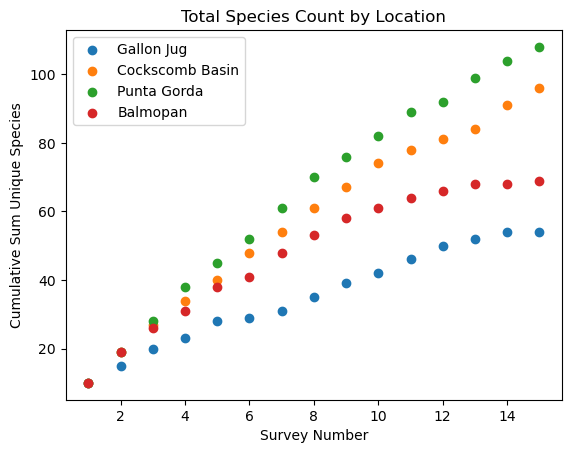

In [19]:
# List of locations
locations = ['Gallon_Jug', 'Cockscomb_Basin', 'Punta_Gorda', 'Balmopan']
for location in locations:
    plt.scatter(data = mac_cumsum_df, x = 'survey_number', y =location, 
                label = f"{location.replace('_', ' ').title()}")

plt.xlabel('Survey Number')
plt.ylabel('Cumulative Sum Unique Species')
plt.title('Total Species Count by Location')
plt.legend()
plt.show()

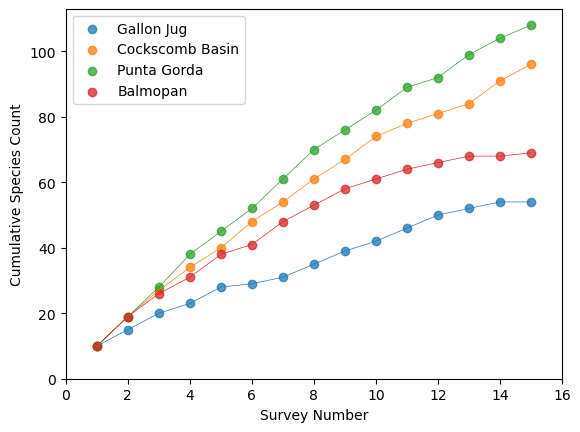

In [20]:
for location in locations:
    plt.scatter(data = mac_cumsum_df, x = 'survey_number', y =location, 
                label = f"{location.replace('_', ' ').title()}",
                alpha = 0.75)
    
    plt.plot(mac_cumsum_df['survey_number'], mac_cumsum_df[location], linewidth=0.5)

plt.xlabel('Survey Number')
plt.ylabel('Cumulative Species Count')
plt.title('')
plt.xlim(0, None)
plt.ylim(0, None)
plt.xticks([0,2,4,6,8,10,12,14,16])
plt.legend()
plt.show()


plt.scatterplot(data=spec_count_tidy, x = 'survey_number', y = 'Count')

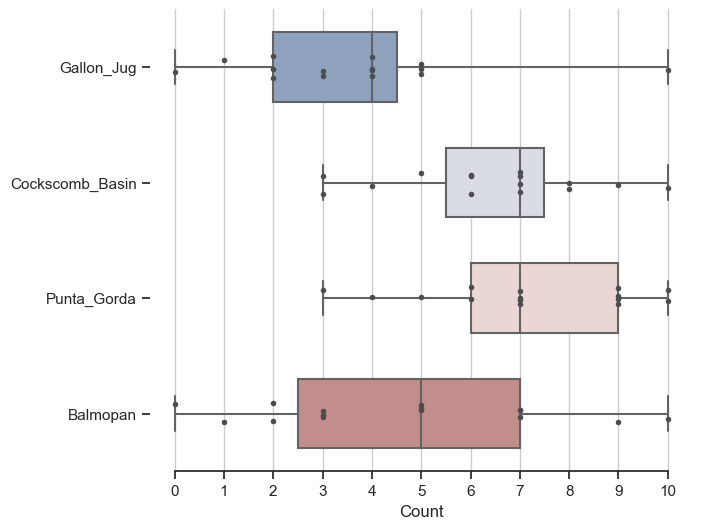

In [21]:
sns.set_theme(style='ticks')

# Initialize the figure
f, ax = plt.subplots(figsize = (7,6))

# Create Boxplot
sns.boxplot(
    spec_count_tidy, x = "Count", y = "Location", whis = [0,100], width = 0.6, palette = 'vlag')

# Add points for each observation

sns.stripplot(spec_count_tidy, x = "Count", y = "Location", size = 4, color = '0.3', dodge = True)

# Tweak visual presentation:
ax.xaxis.grid(True)
ax.set_xticks(range(11))
ax.set(ylabel = "")
sns.despine(trim=True, left=True)
plt.show()


Is there a relationship between survey number and number of new species sighted?

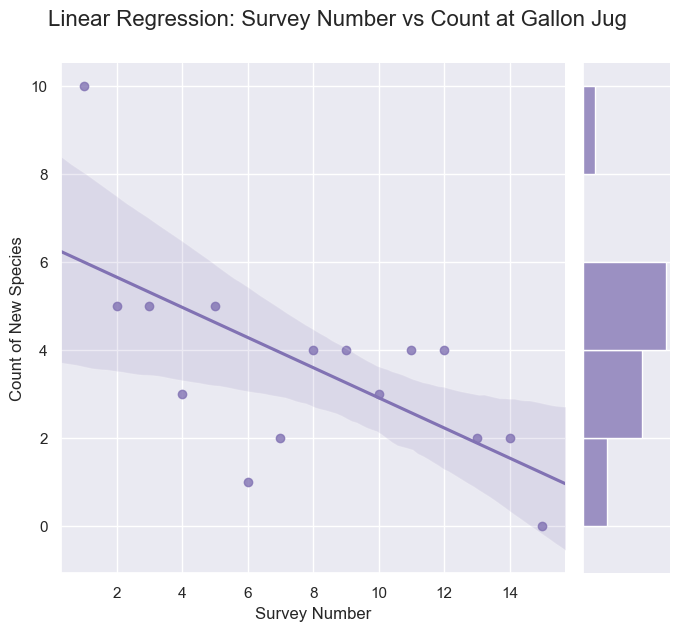

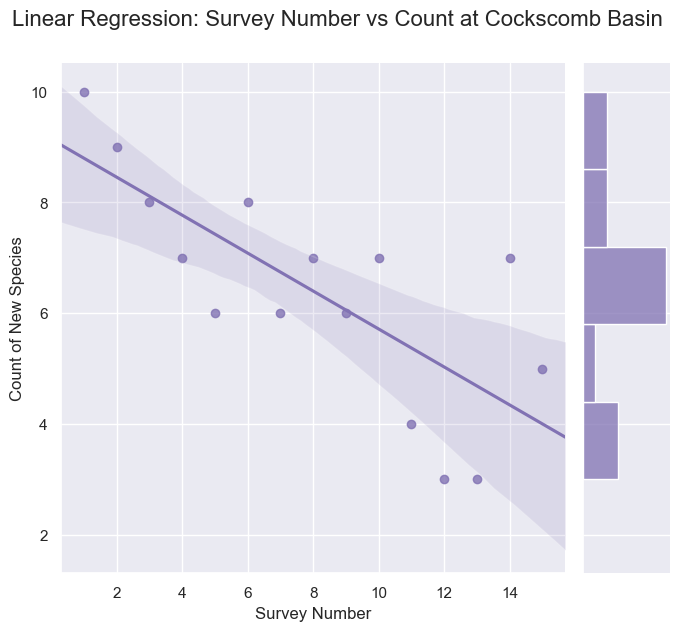

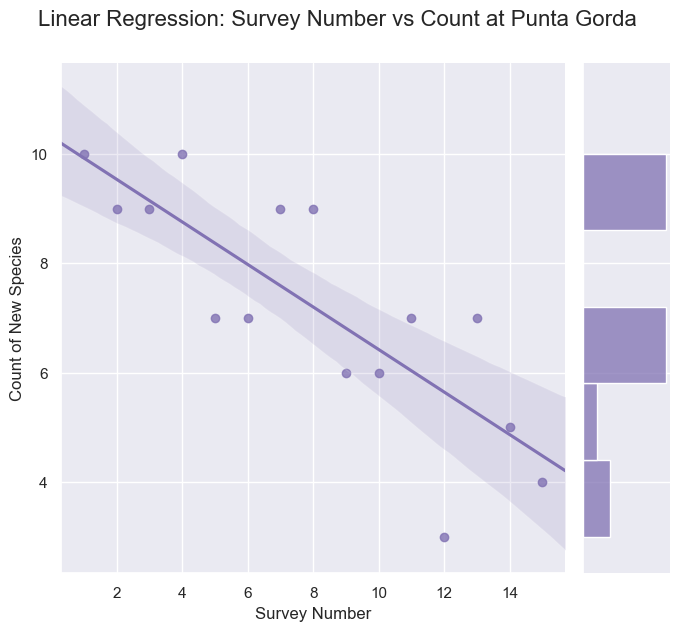

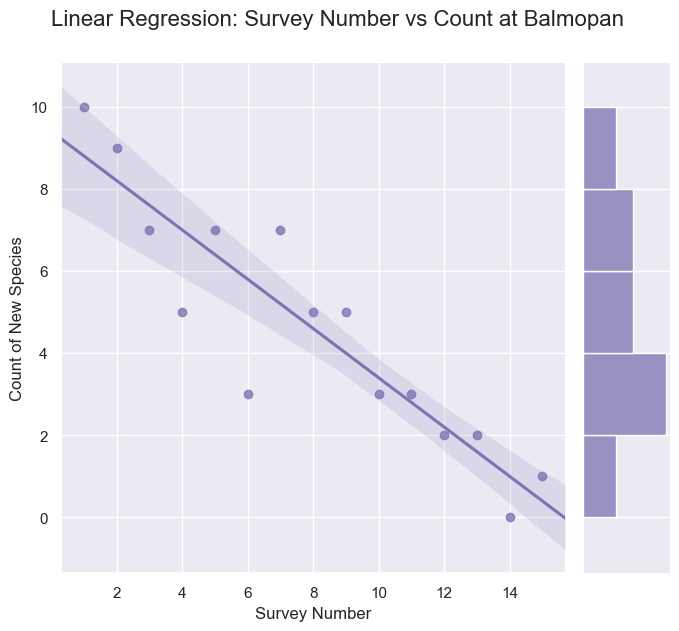

In [22]:
def plot_linear_regression_with_y_hist_tidy(data, x_col, y_col, hue_col, locations, x_label, y_label, xlim=None, ylim=None, color="m", height=7):
    """
    Plots a linear regression with only a y-axis distribution for each specified location
    from a tidy DataFrame.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    x_col (str): The name of the column to use for the x-axis.
    y_col (str): The name of the column to use for the y-axis.
    hue_col (str): The name of the column to use for hue (differentiating different groups).
    locations (list): A list of locations to plot.
    xlim (tuple): X-axis limits for the plot. Pass None for default.
    ylim (tuple): Y-axis limits for the plot. Pass None for default.
    color (str): Color for the plots.
    height (int): Height of each plot.
    """
    sns.set_theme(style="darkgrid")

    for location in locations:
        # Filter data for the current location
        data_filtered = data[data[hue_col] == location]

        # Initialize JointGrid with the specified height
        g = sns.JointGrid(x=x_col, y=y_col, data=data_filtered, height=height)

        # Plot the main scatter plot and regression line
        g.plot_joint(sns.regplot, color=color, truncate=False)

        # Manually add the histogram to the y-axis marginal plot
        sns.histplot(data=data_filtered, y=y_col, ax=g.ax_marg_y, color=color, kde=False)

        # Remove the x-axis marginal plot
        g.ax_marg_x.remove()

        # Set axis limits if specified
        if xlim is not None:
            g.ax_joint.set_xlim(xlim)
        if ylim is not None:
            g.ax_joint.set_ylim(ylim)
            
        # Set axis labels    
        g.ax_joint.set_xlabel(x_label)  # Set x-axis label for the joint plot
        g.ax_joint.set_ylabel(y_label)  # Set y-axis label for the joint plot

        # Set the title
        x_col_title = str(x_col).replace("_"," ").title()
        location_title = str(location).replace("_"," ").title()
        g.fig.suptitle(f"Linear Regression: {x_col_title} vs Count at {location_title}", fontsize=16, y=0.90)
        
        
        plt.show()

# List of locations
locations = ['Gallon_Jug', 'Cockscomb_Basin', 'Punta_Gorda', 'Balmopan']

# Call the function with appropriate parameters
plot_linear_regression_with_y_hist_tidy(spec_count_tidy, 'survey_number', 'Count', 'Location', locations, "Survey Number", "Count of New Species")


In [56]:
spec_count_tidy

,survey_number,Location,Count
0,1,Gallon_Jug,10
1,2,Gallon_Jug,5
2,3,Gallon_Jug,5
3,4,Gallon_Jug,3
4,5,Gallon_Jug,5
5,6,Gallon_Jug,1
6,7,Gallon_Jug,2
7,8,Gallon_Jug,4
8,9,Gallon_Jug,4
9,10,Gallon_Jug,3


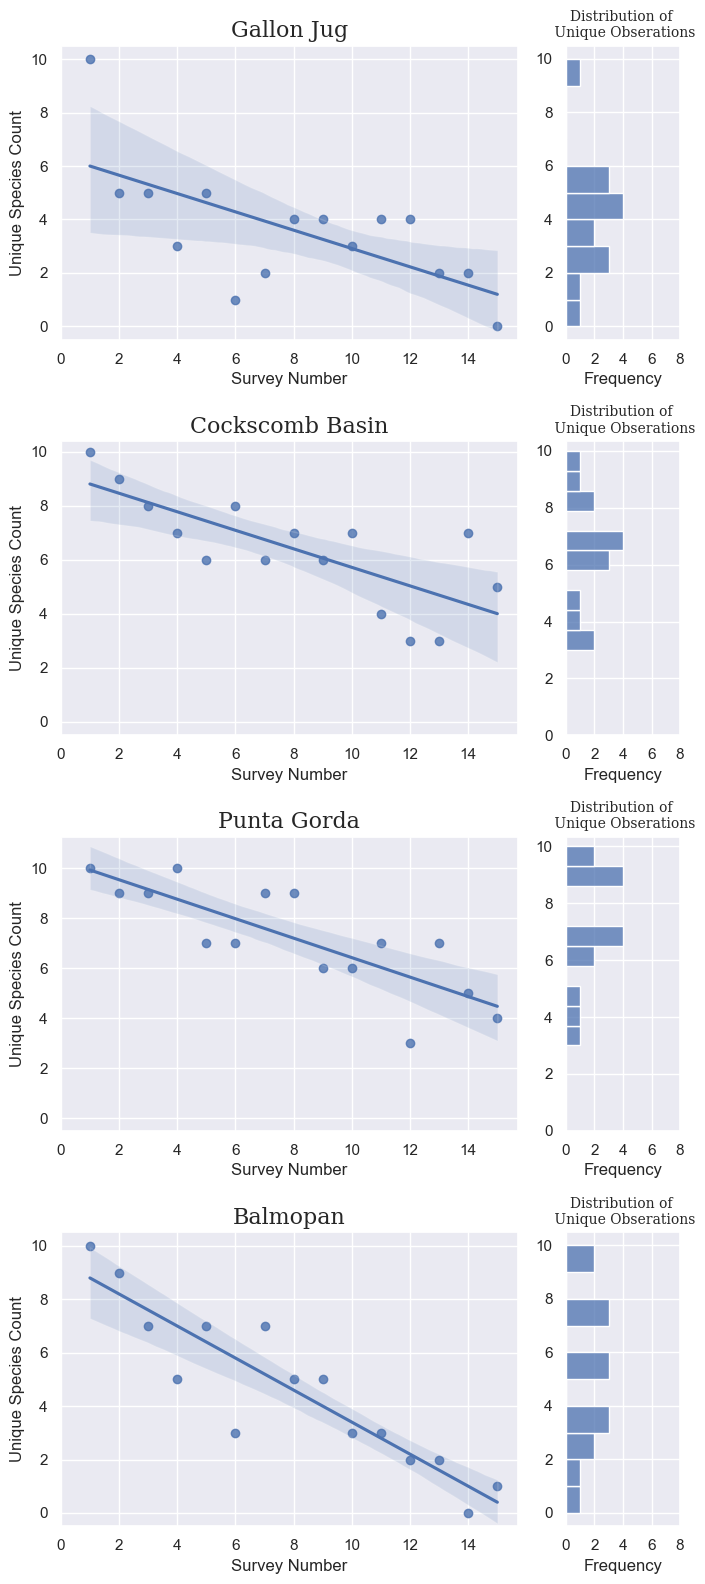

In [49]:
# Create a figure
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(8, 16))

# Create a GridSpec with different widths
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 0.25, 0.1])  # Adjust ratios as needed

# Iterate and create subplots
for i, location in enumerate(locations):
    # Regression plot
    ax_reg = fig.add_subplot(gs[i, 0])
    sns.regplot(x='survey_number', y='Count', data=spec_count_tidy[spec_count_tidy['Location'] == location], ax=ax_reg)
    #ax_reg.set_title(f'Regression Plot for Group {group}')
    ax_reg.set_title(location.replace("_", " ").title(), family='serif', size=16)
    ax_reg.set_xlabel('Survey Number')
    ax_reg.set_ylabel('Unique Species Count')
    
    # Set Origin for each regplot to (0,0)
    ax_reg.set_ylim([-0.5,None]) 
    ax_reg.set_xlim([0,None])
    # ax_reg.set_xlabel('X-Axis Label')
    # ax_reg.set_ylabel('Y-Axis Label')

    # Histogram plot
    ax_hist = fig.add_subplot(gs[i, 1])
    sns.histplot(spec_count_tidy[spec_count_tidy['Location'] == location], y='Count', bins = 10, ax=ax_hist)
    ax_hist.set_title(f'Distribution of \n Unique Obserations', family = 'serif', size = 10)
        # Axis Labels
    ax_hist.set_xlabel('Frequency')
    ax_hist.set_ylabel('')
        # Axis Ticks
    ax_hist.set_yticks([0,2,4,6,8,10])
    #ax_hist.set_yticklabels([])
    ax_hist.set_xticks([0, 2, 4, 6, 8])


# Adjust layout
plt.tight_layout()
plt.show()


TypeError: Axis.set_ticklabels() missing 1 required positional argument: 'labels'

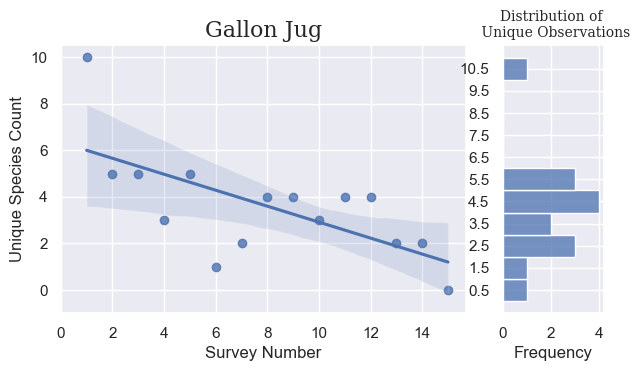

In [66]:

# Assuming spec_count_tidy and locations are defined
# spec_count_tidy = pd.DataFrame(...)  # Your DataFrame initialization
# locations = [...]

# Create a figure
fig = plt.figure(figsize=(8, 16))

# Create a GridSpec with different widths
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 0.25, 0.1])  # Adjust ratios as needed

# Define the bin edges for the histograms
bins = list(range(11))  # Creates a list [0, 1, 2, ..., 10]

# Iterate and create subplots
for i, location in enumerate(locations):
    # Regression plot
    ax_reg = fig.add_subplot(gs[i, 0])
    sns.regplot(x='survey_number', y='Count', data=spec_count_tidy[spec_count_tidy['Location'] == location], ax=ax_reg)
    ax_reg.set_title(location.replace("_", " ").title(), family='serif', size=16)
    ax_reg.set_xlabel('Survey Number')
    ax_reg.set_ylabel('Unique Species Count')
    
    # Set Origin for each regplot to (0,0)
    ax_reg.set_ylim([-1, None]) 
    ax_reg.set_xlim([0, None])

    # Histogram plot with equal bins
        # Define the bin edges for the histograms
    bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # Include 10 in the last bin
    ax_hist = fig.add_subplot(gs[i, 1])
    sns.histplot(spec_count_tidy[spec_count_tidy['Location'] == location], y='Count', bins=bins, ax=ax_hist)
    ax_hist.set_title(f'Distribution of \n Unique Observations', family='serif', size=10)
    ax_hist.set_xlabel('Frequency')
    ax_hist.set_ylabel('')
   # Calculate the midpoints of the bins for the y-tick labels 
    bin_centers = [0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)]
    
    ax_hist.set_xticks([0, 2, 4])
    ax_hist.set_yticks(bin_centers)
    ax_hist.set_yticklabels()

   

   
    # Filter the DataFrame for the current location
    data = spec_count_tidy[spec_count_tidy['Location'] == location]

    # Create the histogram plot with equal bins
    sns.histplot(data, x='Count', bins=bins, ax=ax)
    
    # Customize the plot
    ax.set_title(f'Distribution of Counts for {location.replace("_", " ").title()}', family='serif', size=16)
  
  
    



# Adjust layout
plt.tight_layout()
plt.show()


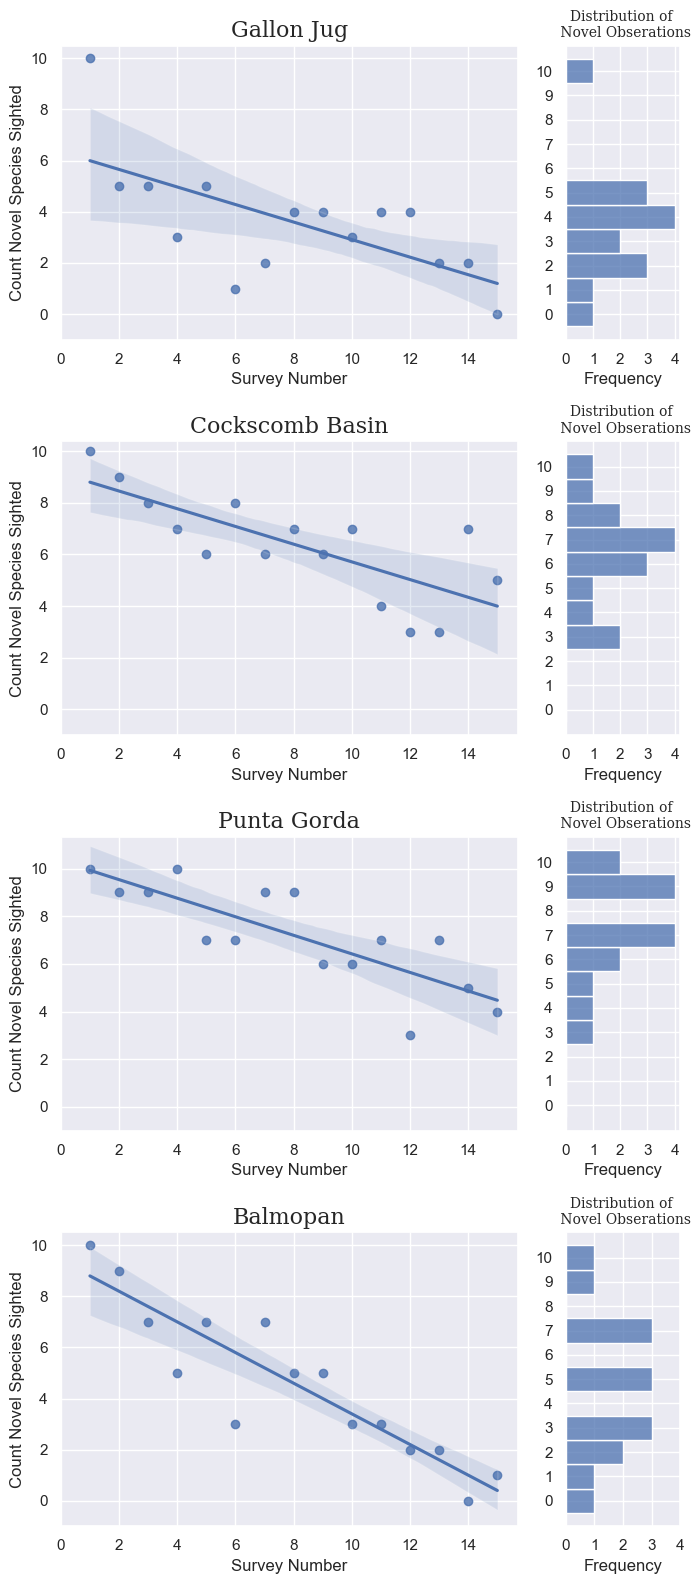

In [87]:
# Assuming spec_count_tidy is already defined with your data
locations = spec_count_tidy['Location'].unique()

# Create a figure
fig = plt.figure(figsize=(8, 16))

# Define the bin edges for the histograms
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # Include 10 in the last bin

# Calculate the midpoints of the bins for the y-tick labels
bin_centers = [0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)]



# Create a GridSpec with different widths
gs = gridspec.GridSpec(4, 3, width_ratios=[1, 0.25, 0.1])  # Adjust ratios as needed


# Iterate and create subplots
for i, location in enumerate(locations):
    # Regression plot
    ax_reg = fig.add_subplot(gs[i, 0])
    sns.regplot(x='survey_number', y='Count', data=spec_count_tidy[spec_count_tidy['Location'] == location], ax=ax_reg)
    ax_reg.set_title(location.replace("_", " ").title(), family='serif', size=16)
    ax_reg.set_xlabel('Survey Number')
    ax_reg.set_ylabel('Count Novel Species Sighted')
    
    # Set Origin for each regplot to (0,0)
    ax_reg.set_ylim([-1, None]) 
    ax_reg.set_xlim([0, None])


# Create histograms

    # Create subplot for each location
    ax_hist = fig.add_subplot(gs[i, 1])
    
    # Filter the DataFrame for the current location
    data = spec_count_tidy[spec_count_tidy['Location'] == location]

    # Create the histogram plot with equal bins
    sns.histplot(data, y='Count', bins=bins, ax=ax_hist)
       
    
    # Customize the plot
    ax_hist.set_title(f'Distribution of \n Novel Obserations', family = 'serif', size = 10)
    ax_hist.set_ylabel('')
    ax_hist.set_xlabel('Frequency')

    # Set y-ticks to the center of the bins
    ax_hist.set_yticks(bin_centers)
    ax_hist.set_yticklabels(range(11))  # Label them with the integer bin values
    
    # Set x-ticks
    ax_hist.set_xticks(labels = [0,1,2,3,4], ticks = [0,1,2,3,4])

plt.tight_layout()
plt.show()


# Diversity indices:

In [24]:
div_indices = pd.read_csv('diversity_indices.csv')
div_indices

,Unnamed: 0,Punta Gorda,Cockscomb Basin,Belmopan,Gallon Jug
0,Taxa (S),240.00000,240.00000,97.00000,96.0000
1,Individuals,1855.00000,3080.00000,1802.00000,1740.0000
2,Dominance (D),0.00443,0.05034,0.01101,0.1069
3,Shannon (H),5.44600,4.41100,4.53500,3.0080
4,Equitability (J),0.99360,0.80490,0.99130,0.6591


# Conservation Regions

In [25]:
import pandas as pd

# Since the data was provided as images, I will manually input the data based on the provided tables.
# If the data were in a CSV or Excel file, we could use pd.read_csv() or pd.read_excel() respectively.

# Data for the whole regions
regions_data = {
    "Punta Gorda": [21868.70218, 20865.42516, 485.0844773, 0, 254.5001819, 391.0615371, 277.7712348, 455.1707524, 0, 0, 44597.71552],
    "Gallon Jug": [1046.69994, 43703.62651, 0, 0, 0, 0, 0, 277.473227, 0, 0, 45027.79968],
    "Cockscomb Basin": [7166.684791, 1587.971017, 0, 7719.339748, 1908.710667, 175.4324533, 549.6014817, 863.743975, 2555.516463, 941.1024885, 19971.48413],
    "Belmopan": [6057.015085, 34078.26773, 292.4081104, 824.8069657, 0, 464.7299283, 0, 0, 0, 0, 45213.84677]
}

# Data for the sample parcels
parcels_data = {
    "Punta Gorda": [1647.973412, 235.0952191, 0, 0, 0, 0, 0, 0, 0, 0, 1883.068631],
    "Gallon Jug": [0, 785.9397508, 0, 0, 0, 0, 0, 0, 0, 0, 785.9397508],
    "Cockscomb Basin": [823.4647316, 1762.650703, 57.7270355, 0, 0, 0, 10.82286924, 0, 0, 0, 2654.665339],
    "Belmopan": [271.6378981, 1317.477185, 0, 0, 0, 0, 0, 0, 0, 0, 1589.115083]
}

# Convert dictionaries to DataFrames
df_regions = pd.DataFrame(regions_data, index=["agricultural", "lowland_broadleaf_forest", "lowland_pine_forest", 
                                               "lowland_savannah", "mangrove", "urban", "water", "wetland", 
                                               "submontane_pine_forest", "submontane_broadleaf_forest", "Total Acrage"])

df_parcels = pd.DataFrame(parcels_data, index=["agricultural", "lowland_broadleaf_forest", "lowland_pine_forest", 
                                                "lowland_savannah", "mangrove", "urban", "water", "wetland", 
                                                "submontane_pine_forest", "submontane_broadleaf_forest", "Total Acrage"])

# Calculate proportions for regions and parcels
df_regions_proportions = df_regions.div(df_regions.loc["Total Acrage"])
df_parcels_proportions = df_parcels.div(df_parcels.loc["Total Acrage"])

# Drop the total acreage row since it's no longer needed for comparison
df_regions_proportions.drop("Total Acrage", inplace=True)
df_parcels_proportions.drop("Total Acrage", inplace=True)

# Next, we will calculate the difference between the proportions in each sample parcel
# compared to its respective region to determine representativeness.
difference = df_regions_proportions.subtract(df_parcels_proportions).abs()

# Now, let's sum up the differences for each region to get a single measure
# of representativeness for each sample parcel.
representativeness = difference.sum().to_frame(name="Representativeness")

representativeness



,Representativeness
Punta Gorda,0.769597
Gallon Jug,0.058816
Cockscomb Basin,1.387512
Belmopan,0.147311


In [26]:
cons_regions = pd.read_csv('conservation_regions.csv')



In [27]:
# Clean up the Category column
cons_regions['Land Category'] = cons_regions['Unnamed: 0'].str.replace("_", ' ').str.title()


In [28]:
# Round and update Orinal DF
cons_regions_numeric= cons_regions.select_dtypes(include='float64').round(1)
cons_regions.update(cons_regions_numeric)    

In [29]:
cons_regions.drop('Unnamed: 0', axis = 1, inplace = True)

In [30]:
print(cons_regions)

   Punta Gorda  Gallon Jug  Cockscomb Basin  Belmopan  \
0      21868.7      1046.7           7166.7    6057.0   
1      20865.4     43703.6           1588.0   34078.3   
2        485.1         NaN              NaN     292.4   
3          NaN         NaN           7719.3     824.8   
4        254.5         NaN           1908.7       NaN   
5        391.1         NaN            175.4     464.7   
6        277.8         NaN            549.6       NaN   
7        455.2       277.5            863.7       NaN   
8          NaN         NaN              NaN    2555.5   
9          NaN         NaN              NaN     941.1   

                 Land Category  
0                 Agricultural  
1     Lowland Broadleaf Forest  
2          Lowland Pine Forest  
3             Lowland Savannah  
4                     Mangrove  
5                        Urban  
6                        Water  
7                      Wetland  
8       Submontane Pine Forest  
9  Submontane Broadleaf Forest  


# Conservation Parsels

In [31]:
cons_parsels = pd.read_csv('conservation_parsels.csv')
cons_parsels

,Unnamed: 0,Punta Gorda,Gallon Jug,Cockscomb Basin,Belmopan
0,agricultural,1647.973412,NaN,823.464732,271.637898
1,lowland_broadleaf_forest,NaN,785.939751,1762.650703,1317.477185
2,lowland_pine_forest,NaN,NaN,57.727035,NaN
3,lowland_savannah,NaN,NaN,NaN,NaN
4,mangrove,NaN,NaN,NaN,NaN
5,urban,NaN,NaN,NaN,NaN
6,water,NaN,NaN,10.822869,NaN
7,wetland,NaN,NaN,NaN,NaN
8,submontane_pine_forest,NaN,NaN,NaN,NaN
9,submontane_broadleaf_forest,NaN,NaN,NaN,NaN


# Survey Counts of Region (Point Count Method)

In [32]:
survey_counts = pd.read_csv('survey_counts.csv')
survey_counts

,SPECIES,COUNT,location
0,Amazon Kingfisher,7,Punta Gorda
1,American Kestrel,7,Punta Gorda
2,American Pygmy Kingfisher,6,Punta Gorda
3,American Redstart,6,Punta Gorda
4,Anhinga,8,Punta Gorda
...,...,...,...
668,Yellow-breasted Chat,19,Belmopan
669,Yellow-crowned Night-Heron,13,Belmopan
670,Yellow-olive Flycatcher,16,Belmopan
671,Yellow-throated Euphonia,23,Belmopan


In [33]:
unique_species_count = survey_counts.groupby('location')['SPECIES'].nunique()
unique_species_df = unique_species_count.reset_index(name='Unique Species Count')

In [34]:
# get the total point counts observed by location
sum_point_counts = survey_counts.groupby('location')['COUNT'].sum()

# Add series as new column to DF
unique_species_df["Total Point Count"] = unique_species_df['location'].map(sum_point_counts)

In [35]:
unique_species_df

,location,Unique Species Count,Total Point Count
0,Belmopan,97,1802
1,Coxcomb Basin,240,3080
2,Gallon Jug,96,1740
3,Punta Gorda,240,1855


Lets try to look at the distribution of total species observed to see if there was any 1 dominate species taking up the majority of the Point counts by location. 

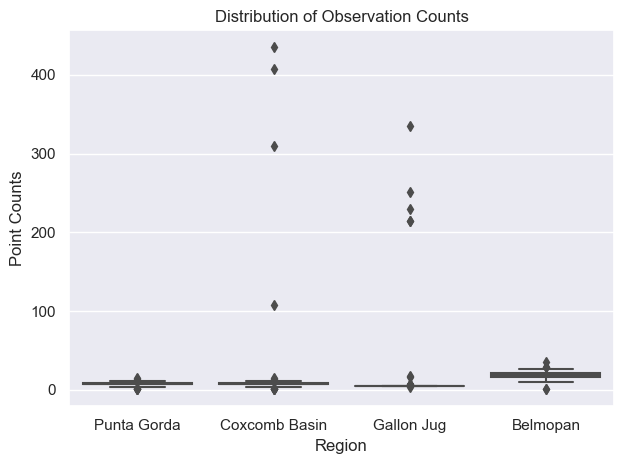

In [36]:
bel = survey_counts[survey_counts.location == 'Belmopan']
sns.boxplot(data = survey_counts, y = 'COUNT', x = 'location')
plt.title("Distribution of Observation Counts")
plt.xlabel('Region')
plt.ylabel('Point Counts')
plt.tight_layout()
plt.show()

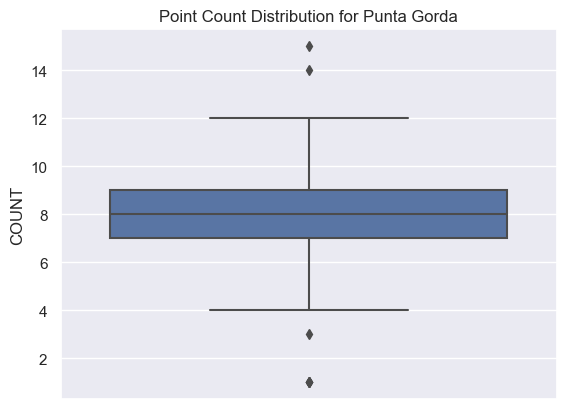

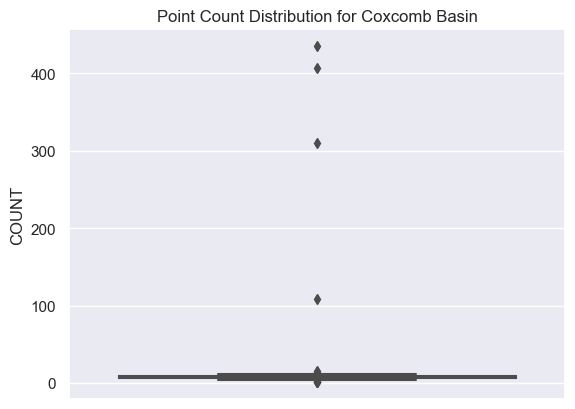

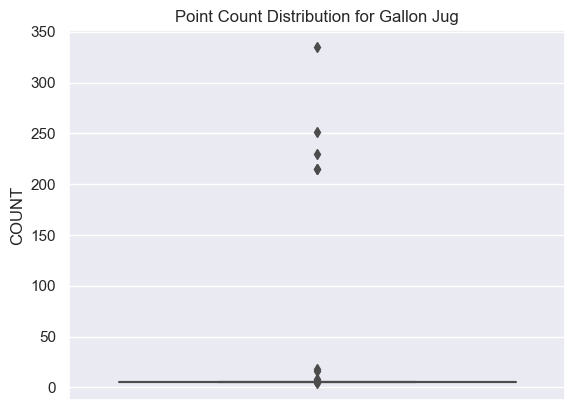

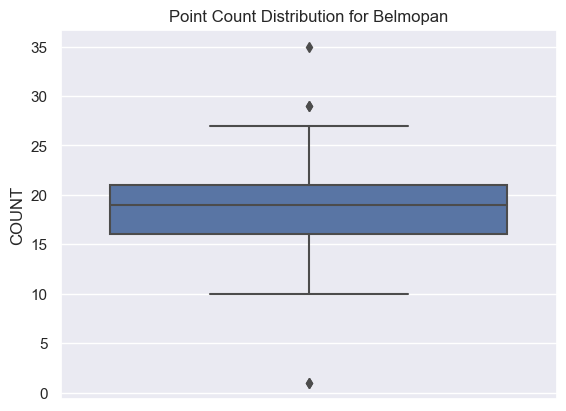

In [37]:
for loc in survey_counts.location.unique():
    data = survey_counts[survey_counts.location == loc]
    sns.boxplot(data = data, y='COUNT')
    
    plt.title(f'Point Count Distribution for {loc}')
    plt.show()

## Top 5 species in each location

In [94]:
grouped= survey_counts.groupby(['location', 'SPECIES'])['COUNT'].sum()

sorted_grouped = grouped.sort_values(ascending = False).groupby(level = 0)
sorted_grouped

top5_species = sorted_grouped.head(5).reset_index()
top5_species

,location,SPECIES,COUNT
0,Coxcomb Basin,Great-tailed Grackle,435
1,Coxcomb Basin,House Wren,407
2,Gallon Jug,Tropical Kingbird,335
3,Coxcomb Basin,Gray Catbird,310
4,Gallon Jug,Blue Grosbeak,251
5,Gallon Jug,Blue-gray Tanager,230
6,Gallon Jug,Gray Catbird,215
7,Gallon Jug,Black Vulture,215
8,Coxcomb Basin,Baltimore Oriole,108
9,Belmopan,Orchard Oriole,35


In [99]:
top5_table = top5_species.sort_values(by = ['location', 'COUNT'], ascending = [True, False])
top5_table

,location,SPECIES,COUNT
9,Belmopan,Orchard Oriole,35
10,Belmopan,Wood Thrush,29
11,Belmopan,Couch's Kingbird,29
12,Belmopan,Montezuma Oropendola,27
13,Belmopan,Blue-black Grosbeak,27
0,Coxcomb Basin,Great-tailed Grackle,435
1,Coxcomb Basin,House Wren,407
3,Coxcomb Basin,Gray Catbird,310
8,Coxcomb Basin,Baltimore Oriole,108
15,Coxcomb Basin,Squirrel Cuckoo,15


In [93]:

# Assuming top5_species is your DataFrame

# Pivot the DataFrame
pivoted_df1 = top5_species.pivot_table(index=['SPECIES', 'COUNT'], columns='location', values='COUNT', aggfunc='first').fillna('')

# Reset index to flatten the multi-index, if necessary
#pivoted_df = pivoted_df.reset_index()

# Since we have duplicate values for 'SPECIES' and 'COUNT', we should drop the COUNT from the index before resetting
# pivoted_df = pivoted_df.droplevel('COUNT', axis=0).reset_index()

pivoted_df1


Empty DataFrame
Columns: []
Index: [(Baltimore Oriole, 108), (Black Vulture, 215), (Blue Grosbeak, 251), (Blue-black Grosbeak, 27), (Blue-gray Tanager, 230), (Couch's Kingbird, 29), (Gray Catbird, 215), (Gray Catbird, 310), (Great-tailed Grackle, 435), (House Wren, 407), (Montezuma Oropendola, 27), (Muscovy Duck, 12), (Orchard Oriole, 35), (Plain Chachalaca, 12), (Ruddy Ground-Dove, 14), (Squirrel Cuckoo, 15), (Tropical Kingbird, 12), (Tropical Kingbird, 335), (Wood Thrush, 29)]

In [101]:
raw_mackinnon

,survey,species,location
0,12,Amazon Kingfisher,Punta Gorda
1,2,American Pygmy Kingfisher,Punta Gorda
2,3,American Pygmy Kingfisher,Punta Gorda
3,6,Anhinga,Punta Gorda
4,14,Anhinga,Punta Gorda
...,...,...,...
595,2,Willow Flycatcher,Coxcomb Basin
596,14,Yellow Warbler,Coxcomb Basin
597,1,Yellow-bellied Sapsucker,Coxcomb Basin
598,1,Yellow-throated Vireo,Coxcomb Basin


In [103]:
# Group by 'species' and 'location', then count the unique 'survey' values
species_survey_count = raw_mackinnon.groupby(['species', 'location'])['survey'].nunique().reset_index()

# Rename the 'survey' column to something more descriptive
species_survey_count.rename(columns={'survey': 'Unique Surveys Count'}, inplace=True)

species_survey_count.head(50)


,species,location,Unique Surveys Count
0,Amazon Kingfisher,Coxcomb Basin,1
1,Amazon Kingfisher,Punta Gorda,1
2,American Kestrel,Coxcomb Basin,1
3,American Pygmy Kingfisher,Coxcomb Basin,1
4,American Pygmy Kingfisher,Punta Gorda,2
5,American Redstart,Gallon Jug,4
6,Anhinga,Punta Gorda,2
7,Baltimore Oriole,Coxcomb Basin,5
8,Baltimore Oriole,Gallon Jug,1
9,Baltimore Oriole,Punta Gorda,1


In [104]:
# Find the top 5 species with the highest Unique Surveys Count at each location
top5_species_by_location = species_survey_count.groupby('location').apply(
    lambda x: x.nlargest(5, 'Unique Surveys Count')
).reset_index(drop=True)

top5_species_by_location



,species,location,Unique Surveys Count
0,Ochre-bellied Flycatcher,Belmopan,5
1,Red-legged Honeycreeper,Belmopan,5
2,Chestnut-sided Warbler,Belmopan,4
3,Dusky Antbird,Belmopan,4
4,Northern Bentbill,Belmopan,4
5,Great-tailed Grackle,Coxcomb Basin,13
6,Gray Catbird,Coxcomb Basin,11
7,House Wren,Coxcomb Basin,11
8,Baltimore Oriole,Coxcomb Basin,5
9,Squirrel Cuckoo,Coxcomb Basin,3
